In [10]:
library(tidyverse)
library(geometry)

## Question 1 - Create Variables + Data Frame

In [11]:
set.seed(246)
W = rnorm(10, 2, 1)
X = rnorm(10, 3, 1)
cor(W,X)
Y = rnorm(10, 5, 1)
noise = rnorm(10, 3, 3)
Z = 0.5*Y^2 + noise
cor(Y,Z)
cor(X,Y)

[1] 0.2058834

[1] 0.9233056

[1] -0.04048927

In [12]:
random_data = data.frame(W, X, Y, Z)
head(random_data)

W,X,Y,Z
2.5333613,3.248837,5.337890,20.841962
2.2511561,4.064831,6.348440,23.089267
1.7100798,2.712970,6.874303,26.844111
0.5164671,3.630170,5.285872,14.301770
2.0340309,2.898615,3.717068,6.017628
3.3439503,5.984700,4.547987,14.926498


## Question 2 - Generate Variable Outcome

In [42]:
outcome = 5 + 1 * W + 2 * X + 3 * Y + 4 * Z
outcome

[1] 113.41255 126.78321 140.13537  85.84150  48.05298  93.66330  71.79985
 [8]  76.07803  72.77852  98.34701

## Question 3 - Model Outcome

In [44]:
model = lm(W ~ (.)^2, data = random_data)
summary(model)


Call:
lm(formula = W ~ (.)^2, data = random_data)

Residuals:
      1       2       3       4       5       6       7       8       9      10 
-0.4338  0.2153  0.1258 -0.8586 -0.6948  0.1393  0.7976  0.2038  0.8292 -0.3238 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) 15.67126   15.26737   1.026    0.380
X           -1.30329    3.12298  -0.417    0.705
Y           -4.25014    4.36399  -0.974    0.402
Z            0.28483    0.49628   0.574    0.606
X:Y          0.47430    0.83964   0.565    0.612
X:Z         -0.05274    0.10640  -0.496    0.654
Y:Z          0.03259    0.06243   0.522    0.638

Residual standard error: 0.9933 on 3 degrees of freedom
Multiple R-squared:  0.5374,	Adjusted R-squared:  -0.3877 
F-statistic: 0.5809 on 6 and 3 DF,  p-value: 0.7386


## Question 4 - Run PCA

In [45]:
res_pca = prcomp(random_data, scale=TRUE)
summary(res_pca)

Importance of components:
                          PC1    PC2    PC3     PC4
Standard deviation     1.4531 1.0354 0.8795 0.20721
Proportion of Variance 0.5279 0.2680 0.1934 0.01073
Cumulative Proportion  0.5279 0.7959 0.9893 1.00000

In [15]:
str(res_pca)

List of 5
 $ sdev    : num [1:4] 1.453 1.035 0.879 0.207
 $ rotation: num [1:4, 1:4] -0.373 -0.158 0.663 0.63 -0.47 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:4] "W" "X" "Y" "Z"
  .. ..$ : chr [1:4] "PC1" "PC2" "PC3" "PC4"
 $ center  : Named num [1:4] 2.34 3.66 5.09 15.69
  ..- attr(*, "names")= chr [1:4] "W" "X" "Y" "Z"
 $ scale   : Named num [1:4] 0.843 1.323 0.946 6.401
  ..- attr(*, "names")= chr [1:4] "W" "X" "Y" "Z"
 $ x       : num [1:10, 1:4] 0.645 1.602 2.74 0.813 -1.685 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:4] "PC1" "PC2" "PC3" "PC4"
 - attr(*, "class")= chr "prcomp"


In [16]:
res_pca$rotation

,PC1,PC2,PC3,PC4
W,-0.3732856,-0.4702490,-0.77718127,0.18844898
X,-0.1579991,-0.8164196,0.54813990,-0.08965426
Y,0.6628221,-0.2162086,-0.01374078,0.71675094
Z,0.6295721,-0.2560834,-0.30877680,-0.66536996


In [17]:
res_pca$sdev^2

[1] 2.1115696 1.0720237 0.7734689 0.0429378

In [18]:
res_pca$rotation[2,1]

[1] -0.1579991

## Question 5 - Run Bi-Plot

In [30]:
library(factoextra)

Warning message:
“package ‘factoextra’ was built under R version 3.6.3”Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


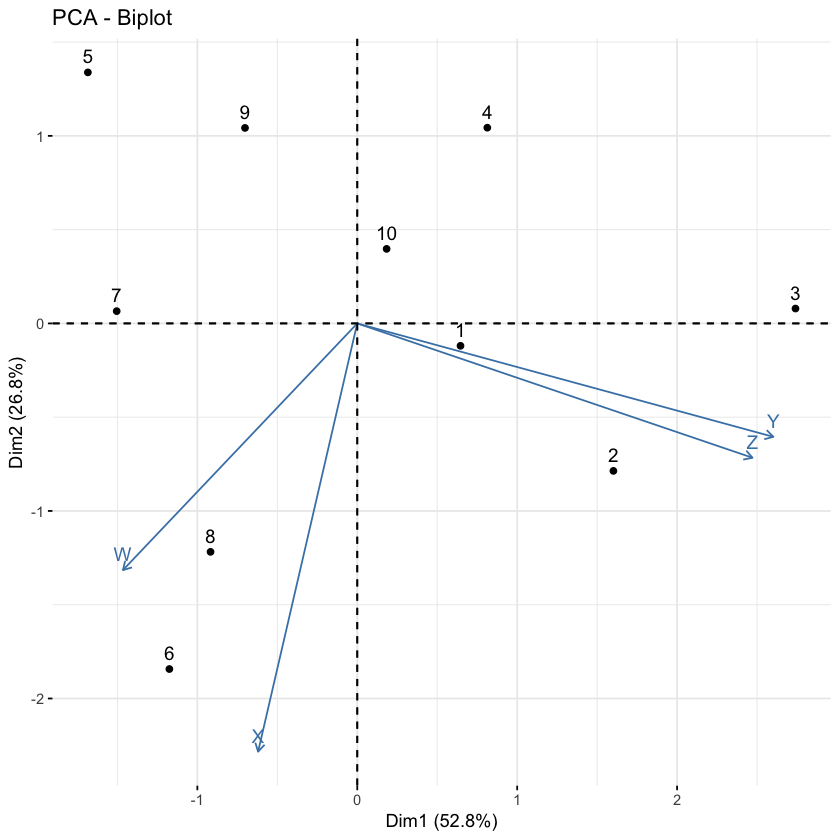

In [31]:
fviz_pca_biplot(res_pca)

## Question 6 - Efficiency

How efficient is the new lower-dimensional space representation at predicting the outcome?  Do your results match your model params?

In [35]:
## Yes!  PC1 proportion of variance = 0.5279, PC2 proportion of variance = 0.2680